# Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/Users/durgaboddet/Desktop/Project/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


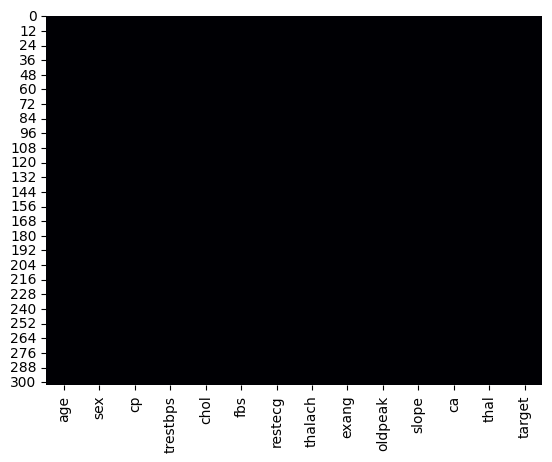

In [7]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trestbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalach,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exang,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


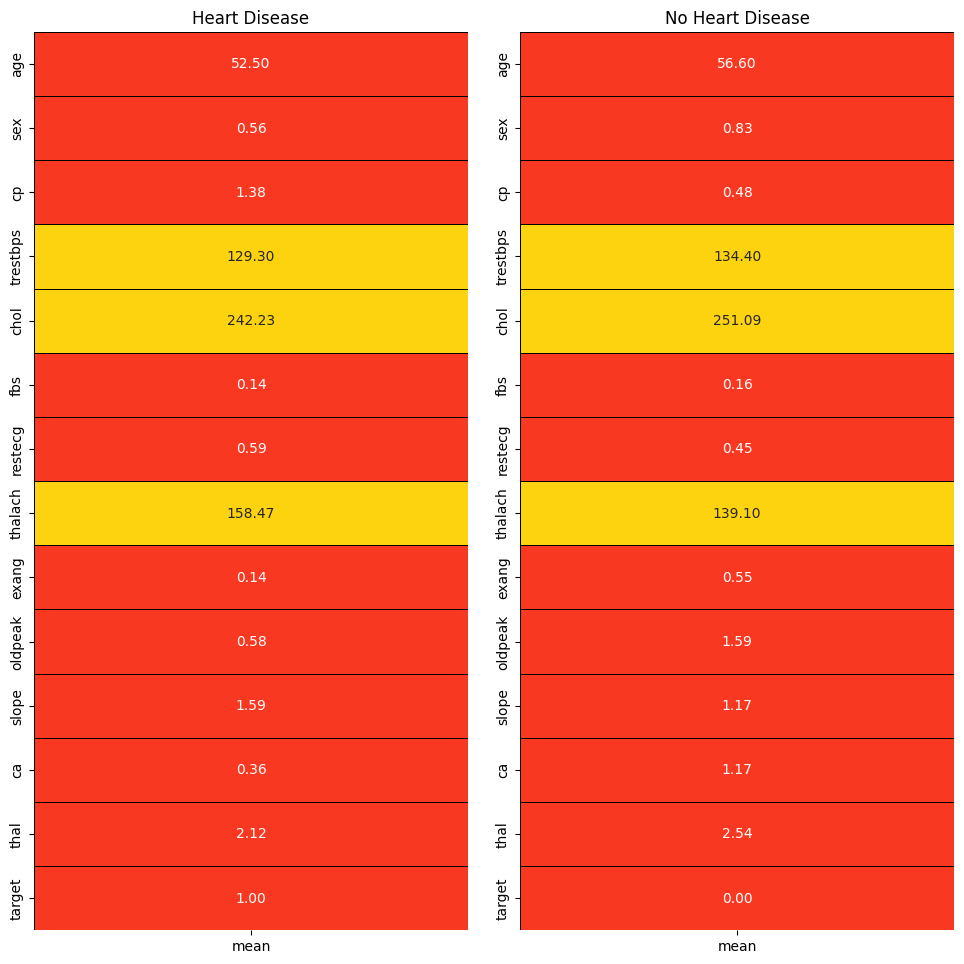

In [10]:
yes = data[data['target'] == 1].describe().T
no = data[data['target'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

plt.subplot(1,2,1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Heart Disease')

fig.tight_layout(pad=2)
plt.show()

# EDA

## Dividing features into Numerical and Categorical :

In [11]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : sex cp fbs restecg exang slope ca thal target
Numerical Features : age trestbps chol thalach oldpeak


## Categorical Features :

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep=True)

df1['sex'] = le.fit_transform(df1['sex'])
df1['cp'] = le.fit_transform(df1['cp'])
df1['restecg'] = le.fit_transform(df1['restecg'])
df1['exang'] = le.fit_transform(df1['exang'])
df1['slope'] = le.fit_transform(df1['slope'])

## Distribution of Categorical Features :

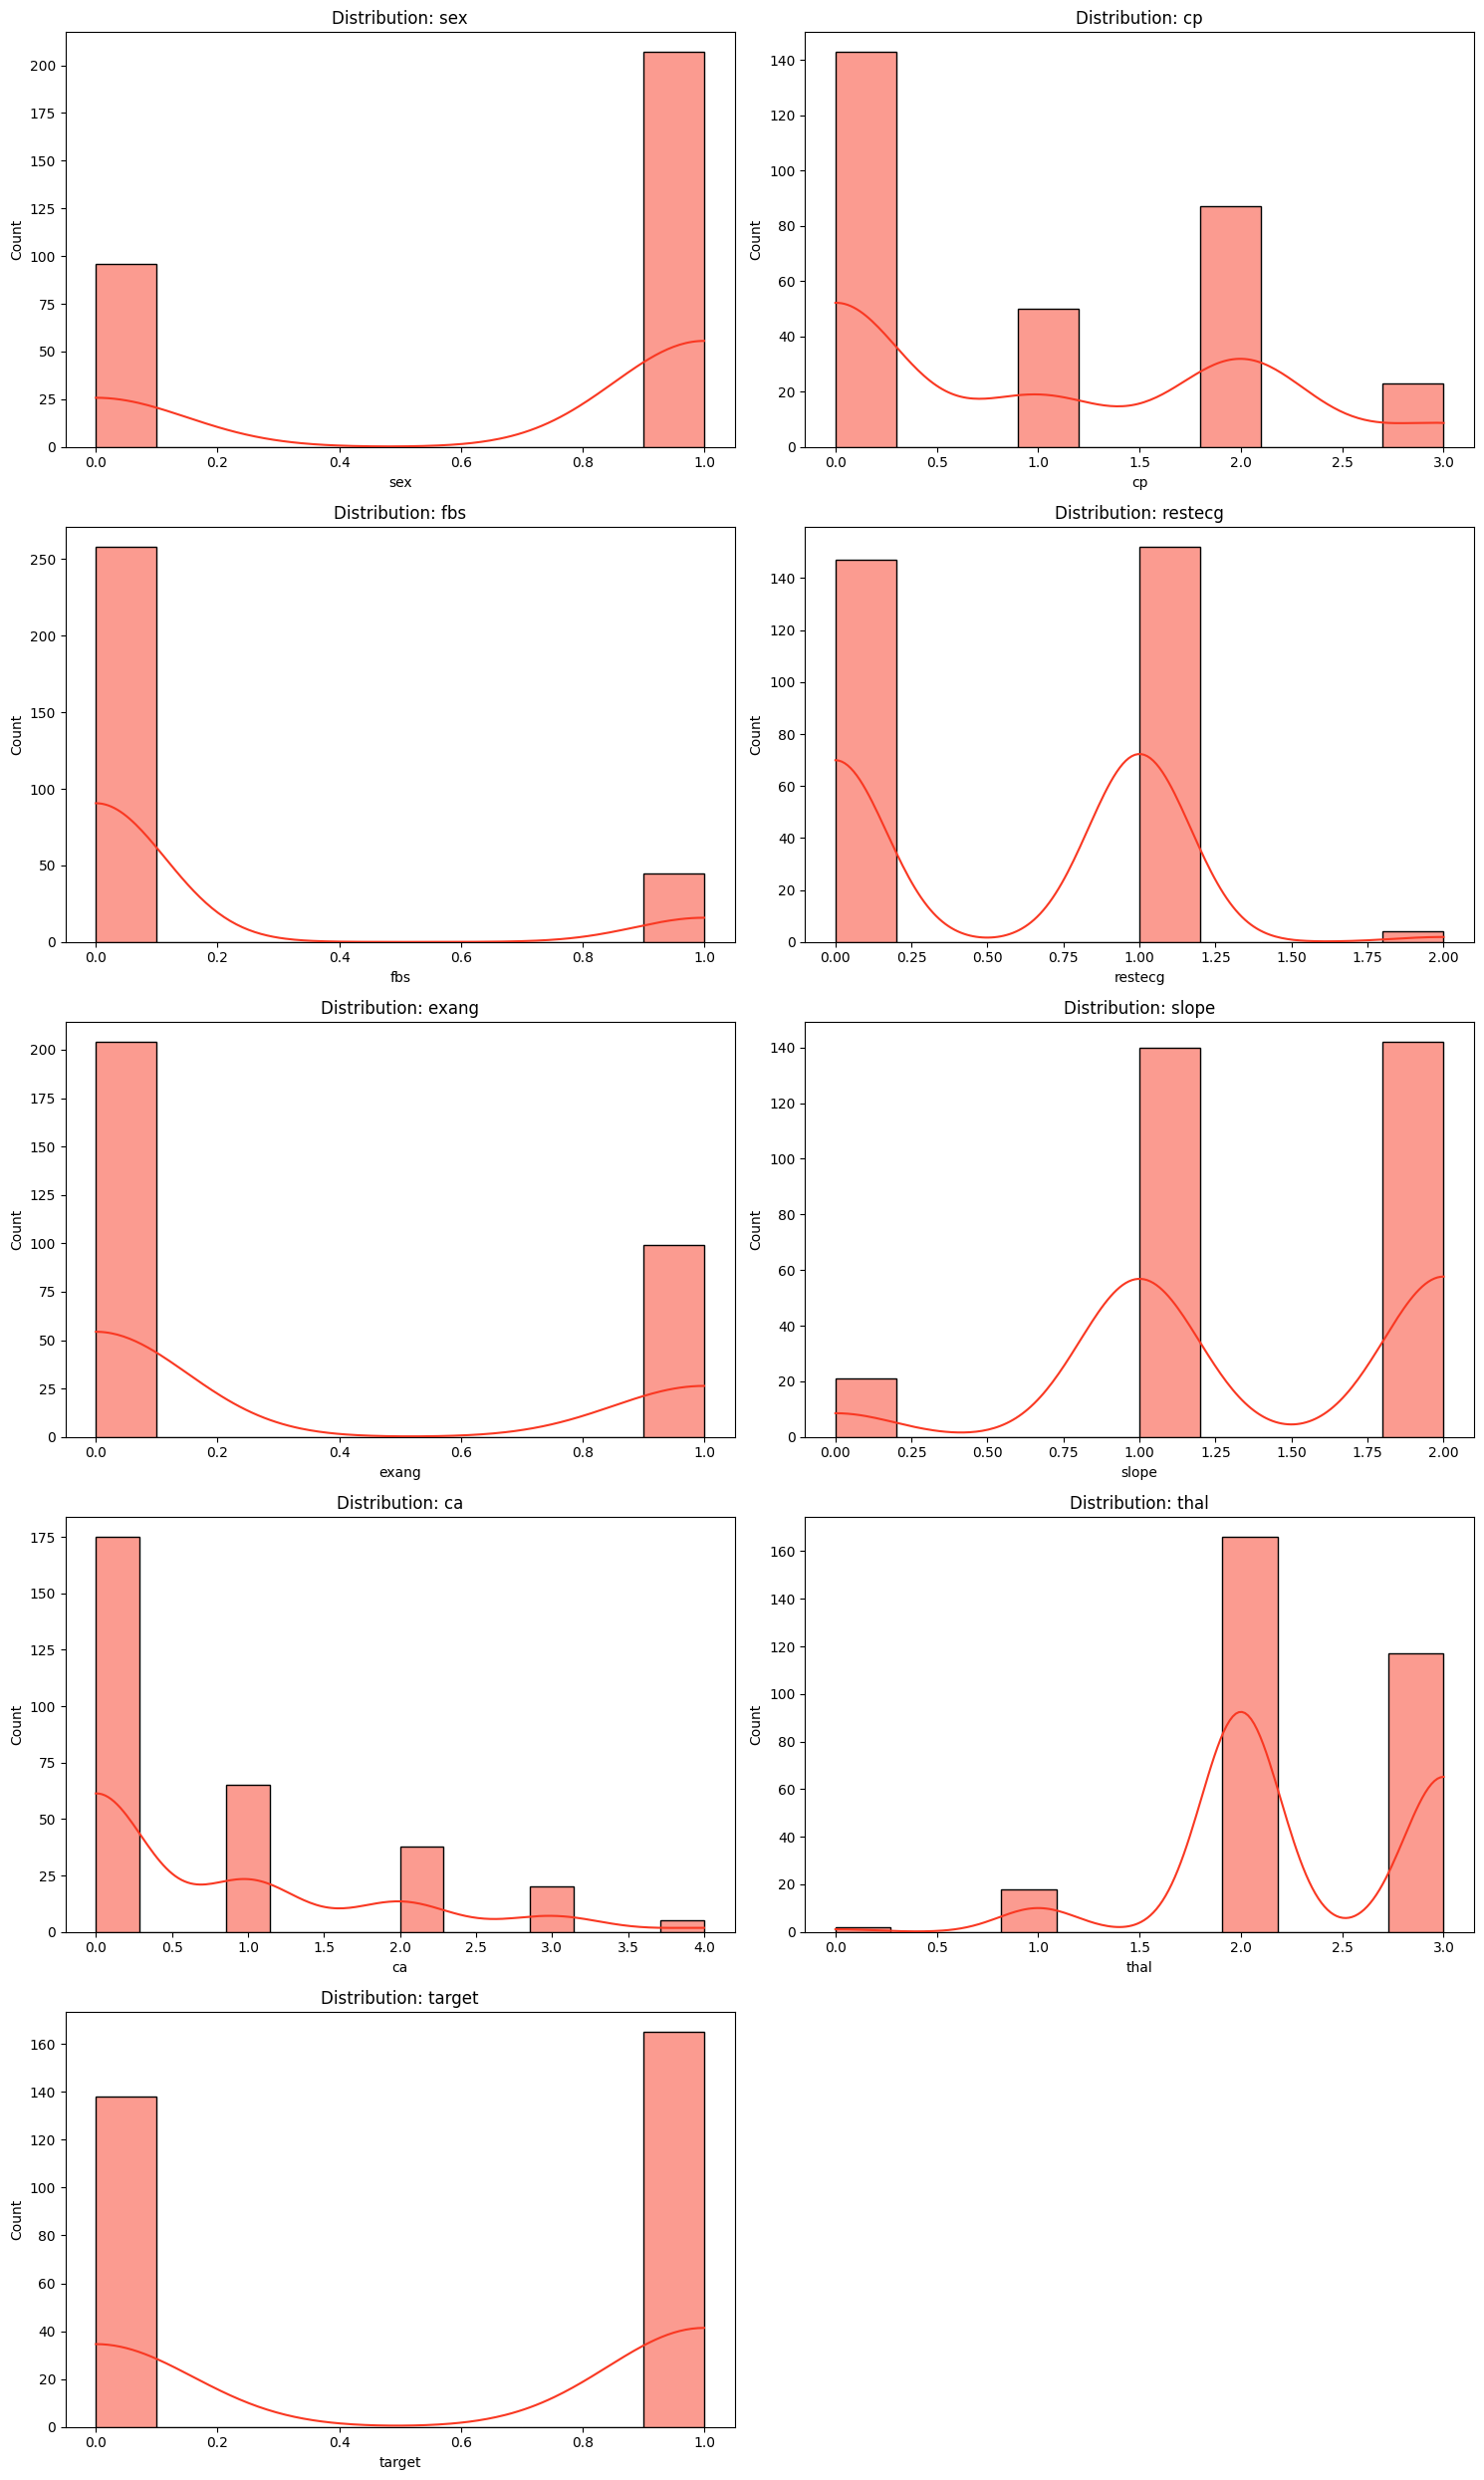

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed
n_features = len(categorical_features)
n_rows = (n_features + 1) // 2  # Round up to the nearest integer

# Create the main figure
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5*n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
    sns.histplot(data=df1, x=feature, kde=True, ax=axes[i], color=colors[0])
    axes[i].set_title(f'Distribution: {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Numerical Features :

## Distribution of Numerical Features :

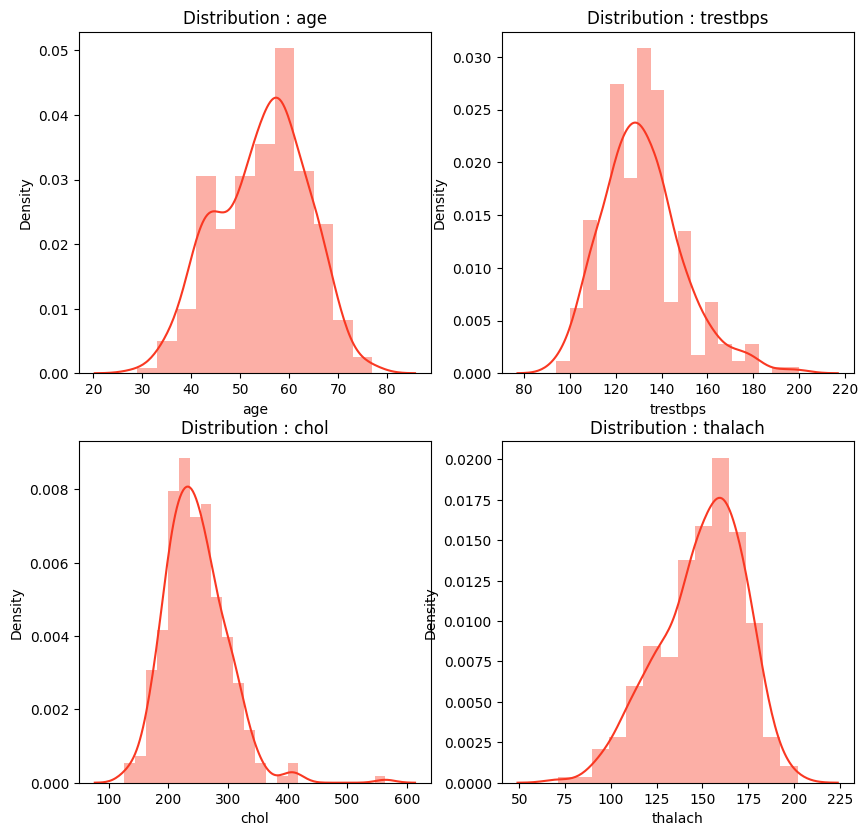

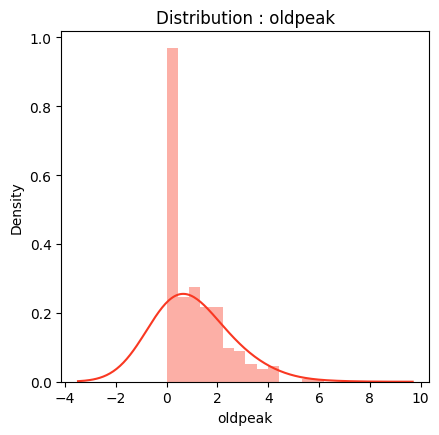

In [16]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

## Target Variable Visualization (HeartDisease) :

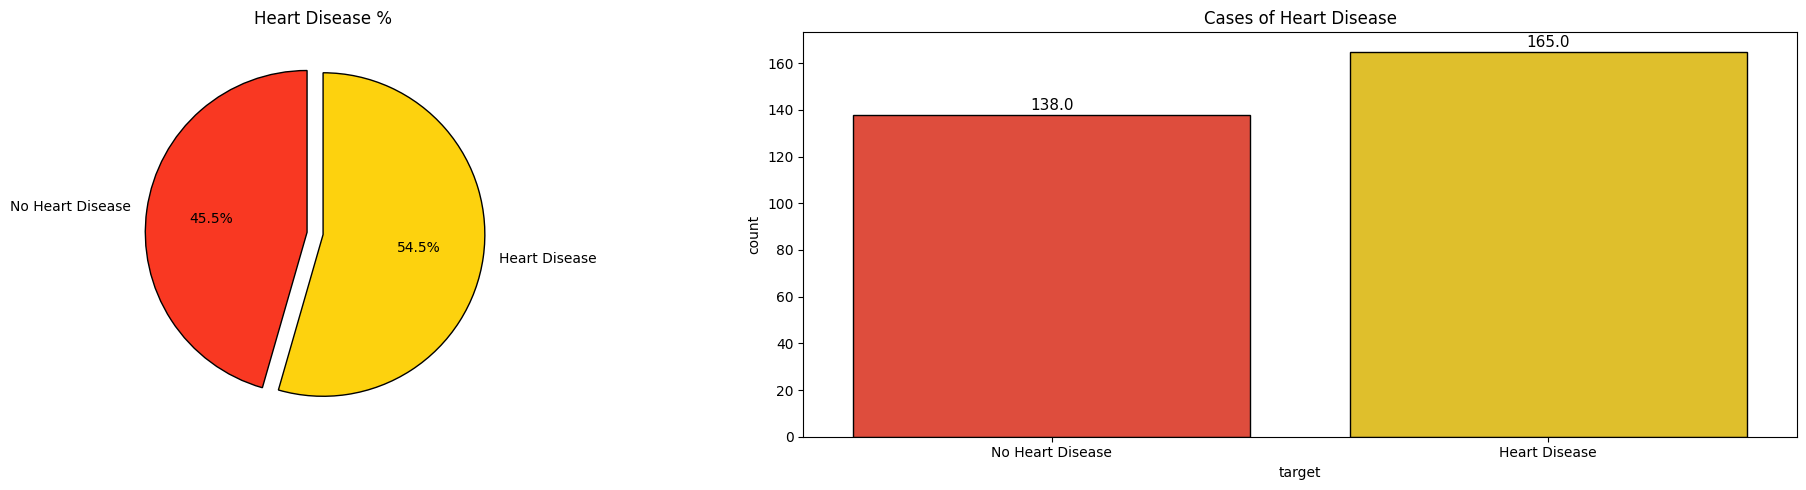

In [18]:
l = list(data['target'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

plt.subplot(1,2,1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

plt.subplot(1,2,2)
ax = sns.countplot(x='target', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

plt.tight_layout()
plt.show()

## Categorical Features vs Target Variable (HeartDisease) :

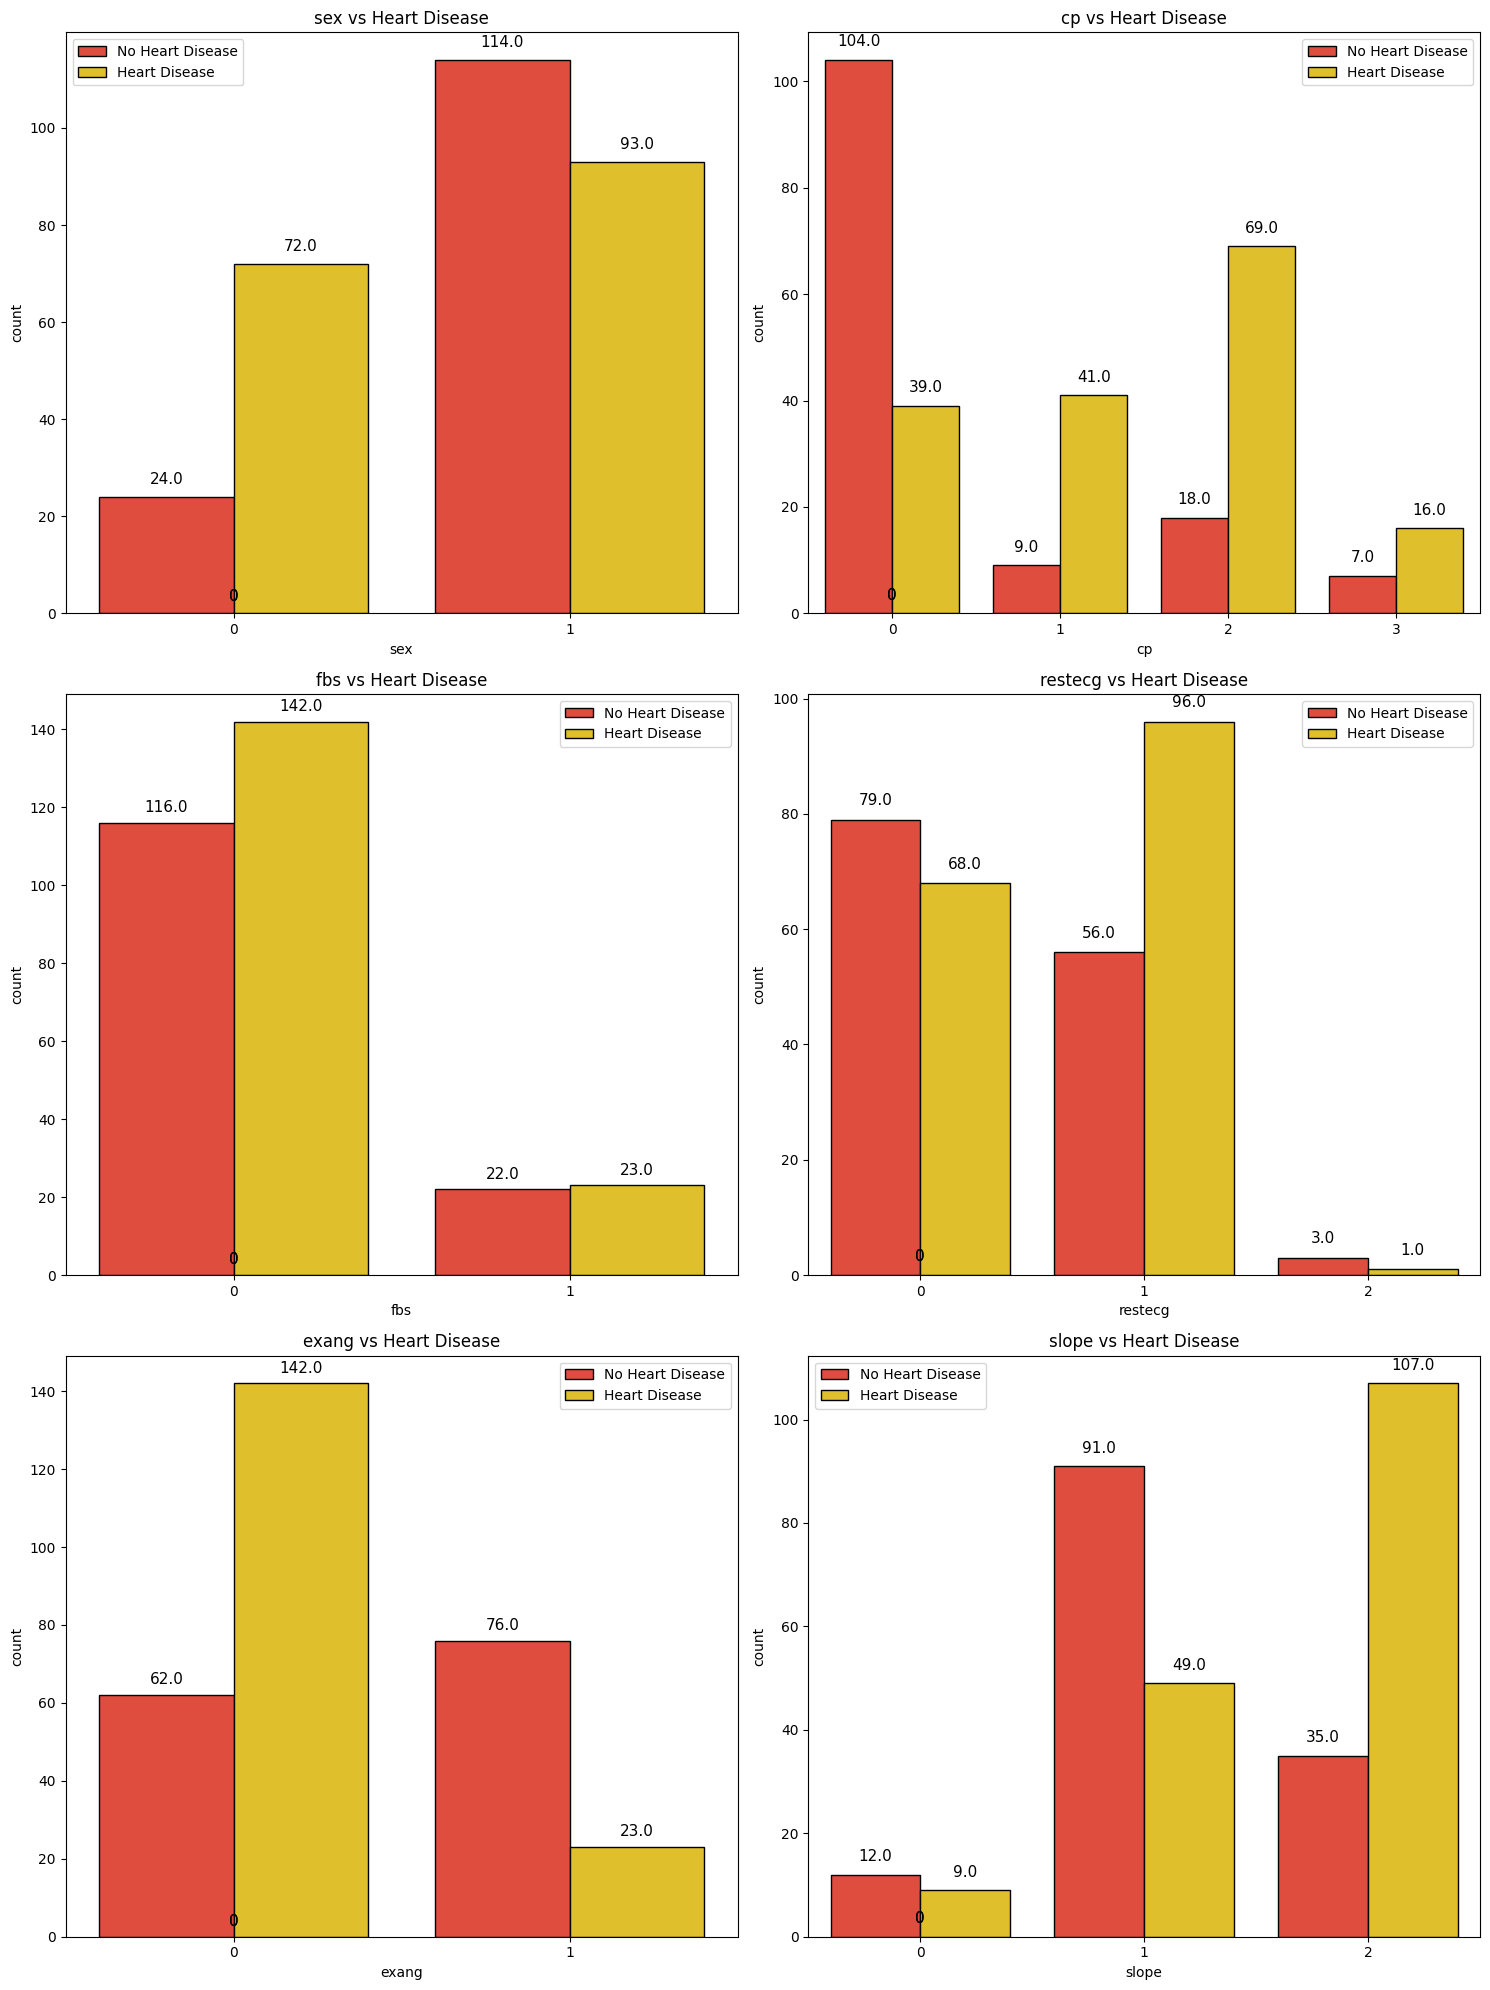

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, feature in enumerate(categorical_features):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        ax = axes[i]
        sns.countplot(x=feature, data=data, hue="target", palette=colors, edgecolor='black', ax=ax)
        
        for rect in ax.patches:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 2, f'{height}',
                    ha='center', va='bottom', fontsize=11)
        
        title = f'{feature} vs Heart Disease'
        ax.set_title(title)
        ax.legend(['No Heart Disease', 'Heart Disease'])

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Categorical Features vs Positive Heart Disease Cases :

In [22]:
sex = data[data['target'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['target'] == 1]['cp'].value_counts()
cp = [cp[i] / sum(cp) * 100 for i in range(len(cp))]

fbs = data[data['target'] == 1]['fbs'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100, fbs[1] / sum(fbs) * 100]

restecg = data[data['target'] == 1]['restecg'].value_counts()
restecg = [restecg[i] / sum(restecg) * 100 for i in range(len(restecg))]

exang = data[data['target'] == 1]['exang'].value_counts()
exang = [exang[0] / sum(exang) * 100, exang[1] / sum(exang) * 100]

slope = data[data['target'] == 1]['slope'].value_counts()
slope = [slope[i] / sum(slope) * 100 for i in range(len(slope))]

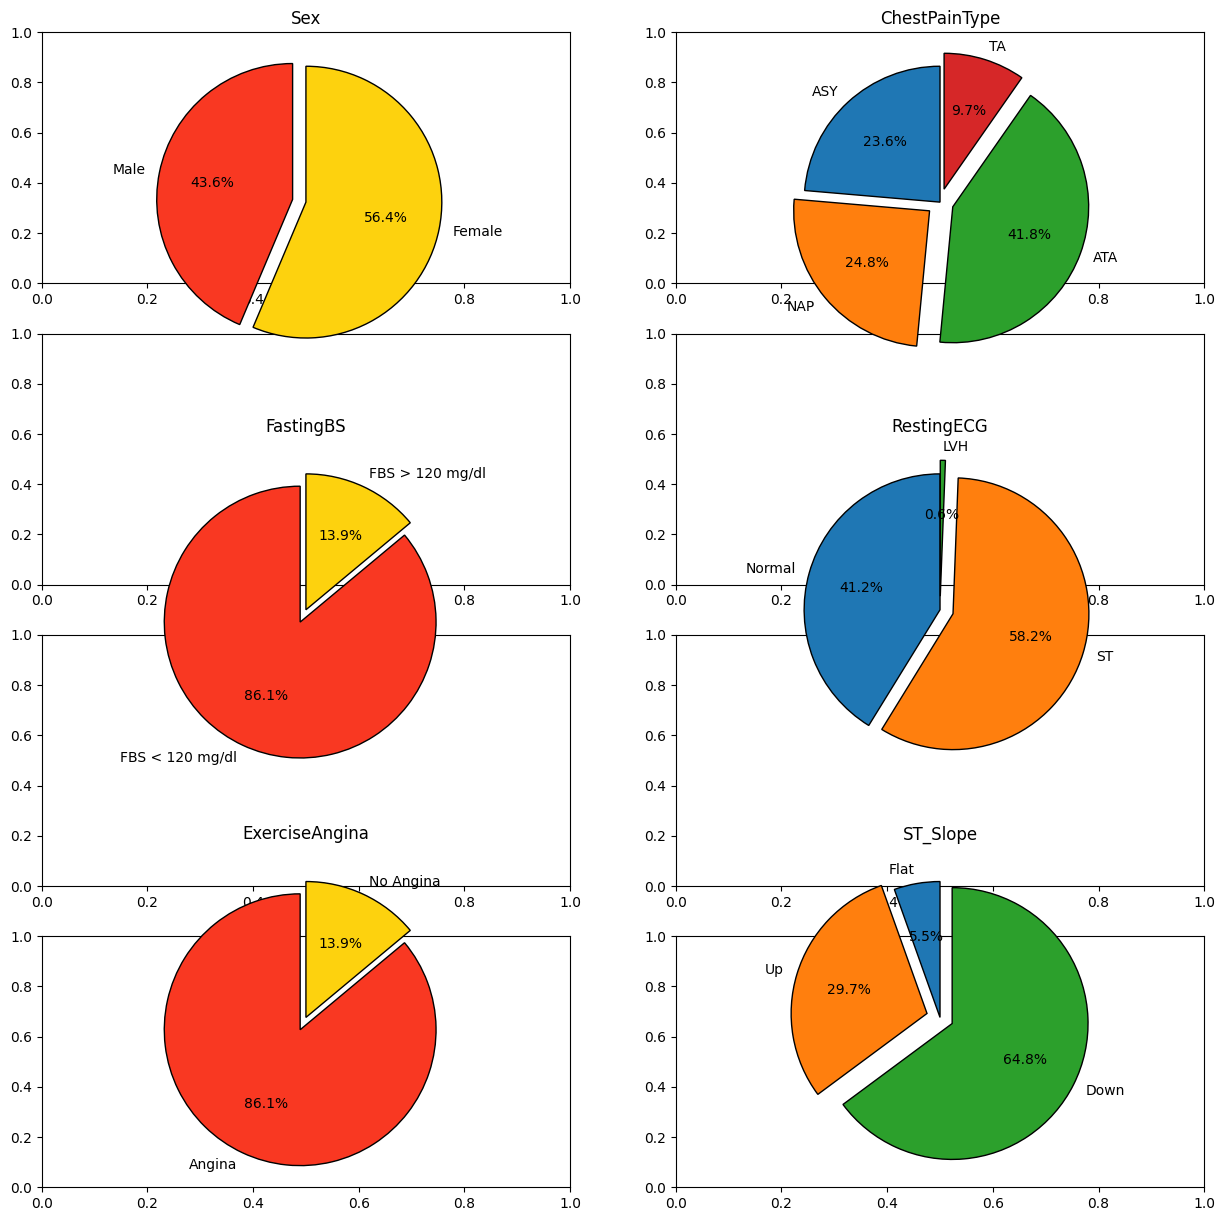

In [23]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

## Numerical Features vs Target Variable (HeartDisease) :

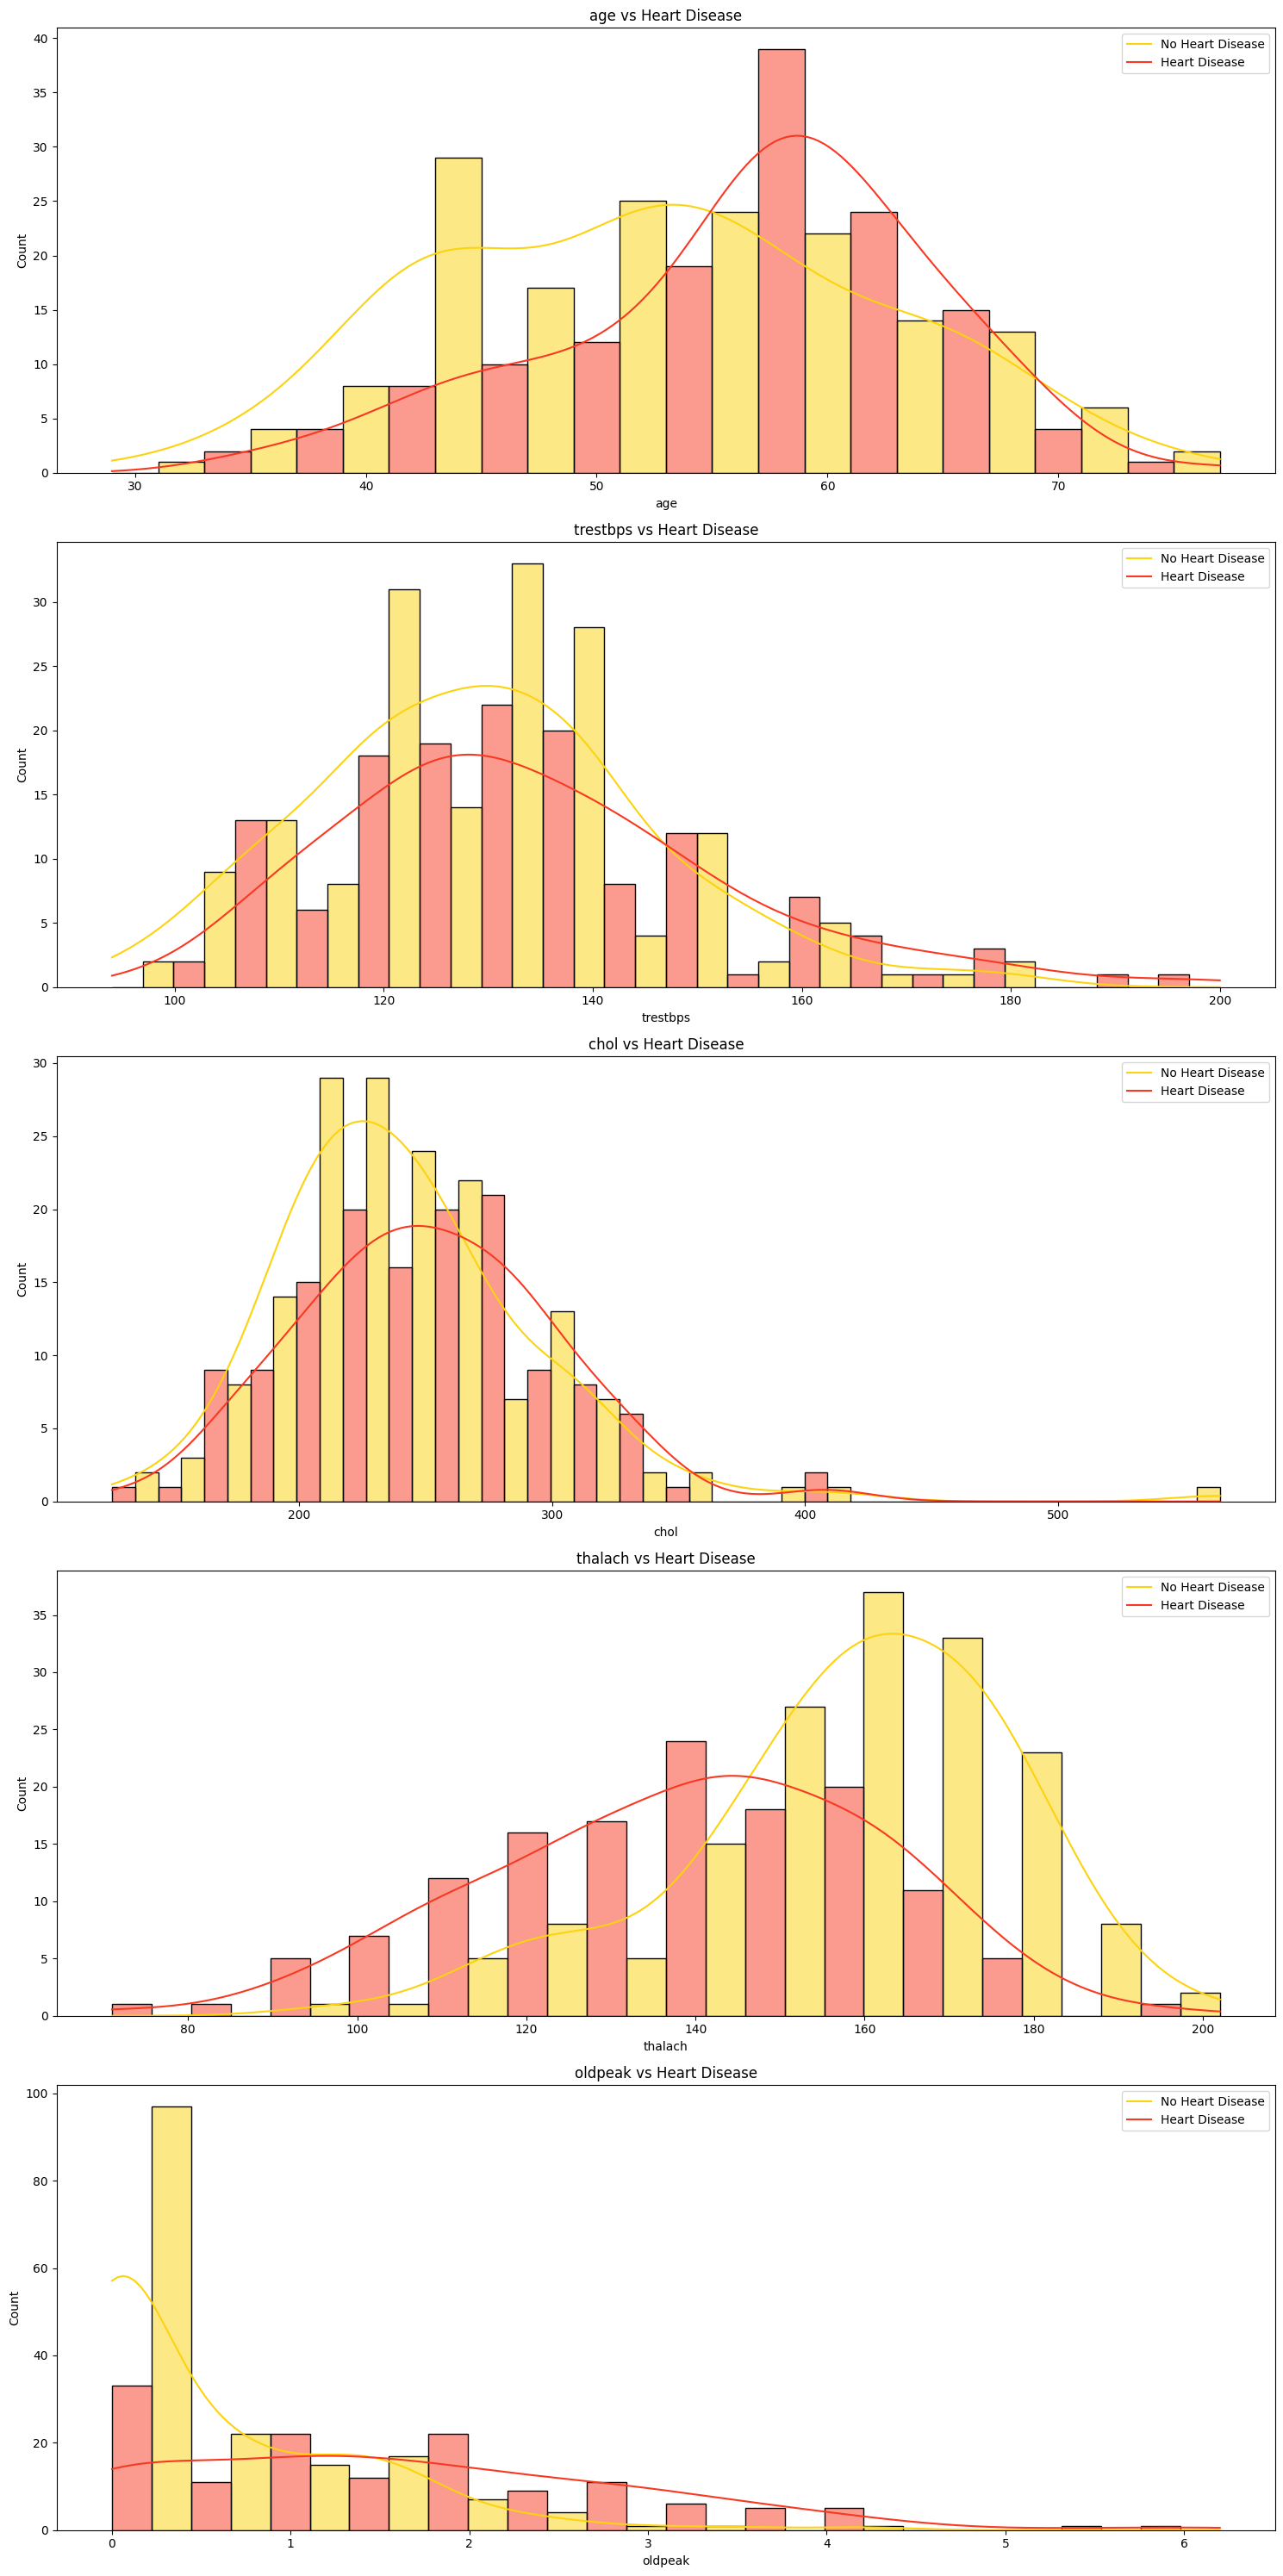

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.histplot(data=data, x=feature, hue="target", palette=colors, multiple="dodge", kde=True, ax=ax)
    title = f'{feature} vs Heart Disease'
    ax.set_title(title)
    ax.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

## Data Scaling :

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler()  # Normalization
ss = StandardScaler()  # Standardization

df1['oldpeak'] = mms.fit_transform(df1[['oldpeak']])
df1['age'] = ss.fit_transform(df1[['age']])
df1['trestbps'] = ss.fit_transform(df1[['trestbps']])
df1['chol'] = ss.fit_transform(df1[['chol']])
df1['thalach'] = ss.fit_transform(df1[['thalach']])
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.95,1,3,0.76,-0.26,1,0,0.02,0,0.37,0,0,1,1
1,-1.92,1,2,-0.09,0.07,0,1,1.63,0,0.56,0,0,2,1
2,-1.47,0,1,-0.09,-0.82,0,0,0.98,0,0.23,2,0,2,1
3,0.18,1,1,-0.66,-0.20,0,1,1.24,0,0.13,2,0,2,1
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,0.10,2,0,2,1


## Correlation Matrix :

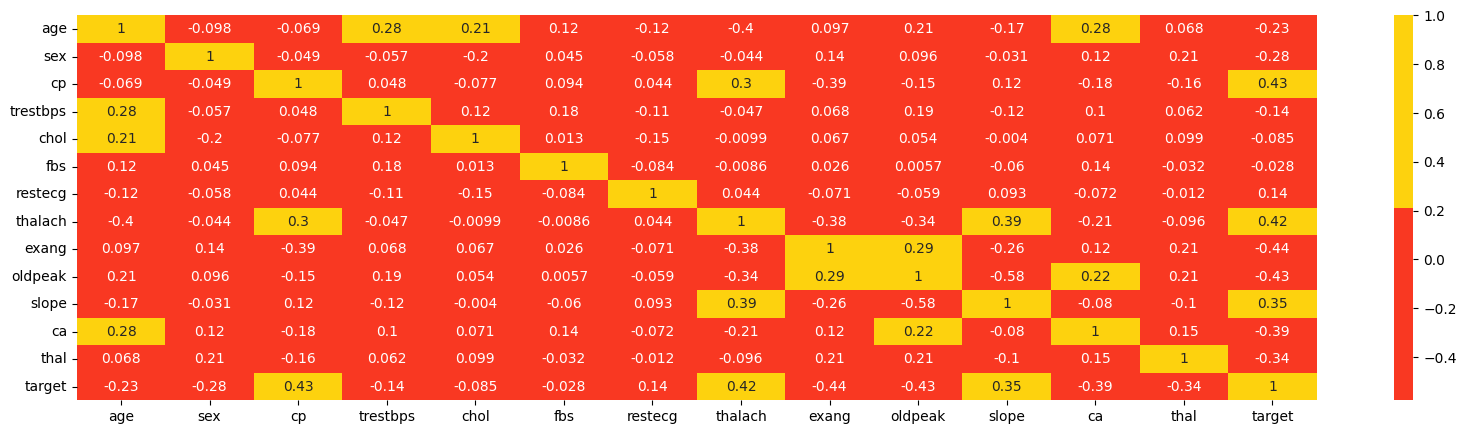

In [28]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

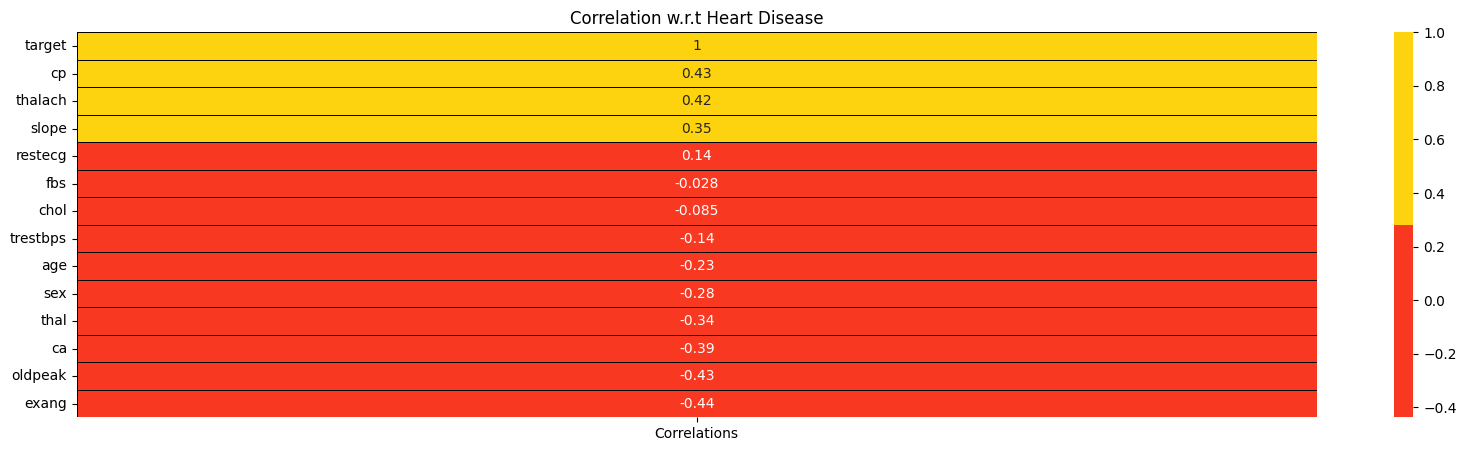

In [30]:
corr = df1.corrwith(df1['target']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']
plt.figure(figsize=(20,5))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Heart Disease')
plt.show()

## Feature Selection for Categorical Features : (Chi Squared Test :)

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

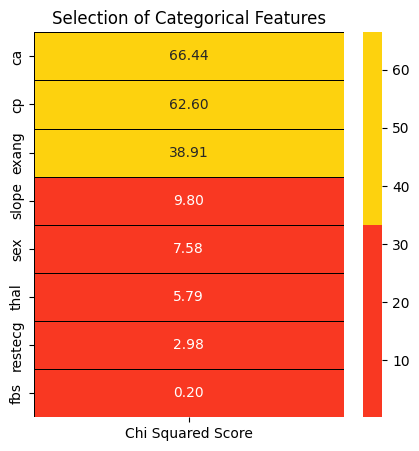

In [32]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

## Feature Selection for Numerical Features : (ANOVA Test)

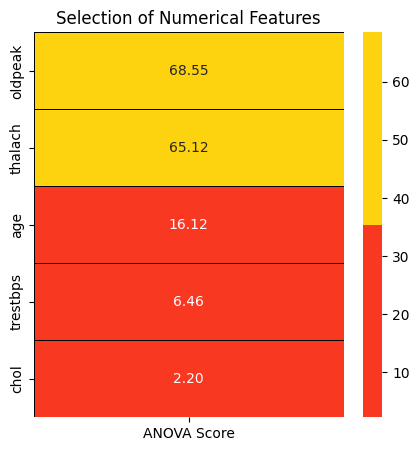

In [33]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

# MODELING

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [52]:
import os

print("Current working directory:", os.getcwd())
print("Files in the current directory:", os.listdir())

Current working directory: /Users/durgaboddet/Desktop/Project
Files in the current directory: ['heart.ipynb', 'app.ipynb', '.DS_Store', 'heart.csv', 'app.py', 'templates']


In [53]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import os

# Load the dataset
df = pd.read_csv('heart.csv')

# Print the column names
print("Columns in the dataset:", df.columns.tolist())

# Assuming the target column is named 'target', adjust if it's different
target_column = 'target'  # Replace with your actual target column name if it's different

X = df.drop(target_column, axis=1)  # features
y = df[target_column]  # target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Save the model
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Verify the files were created
print("Files in the current directory after saving:", os.listdir())

Columns in the dataset: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Files in the current directory after saving: ['heart.ipynb', 'scaler.pkl', 'app.ipynb', '.DS_Store', 'heart.csv', 'app.py', 'templates', 'heart_disease_model.pkl']


In [37]:
features = df1[df1.columns.drop(['target', 'trestbps', 'restecg'])].values
target = df1['target'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)

In [43]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

def model(classifier):
    
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy : ", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # Use RocCurveDisplay instead of plot_roc_curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()



def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))


# Logistic Regression :

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy :  86.89%
Cross Validation Score :  88.35%
ROC_AUC Score :  87.34%


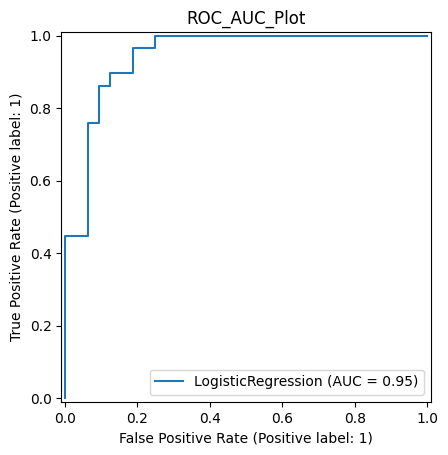

In [46]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



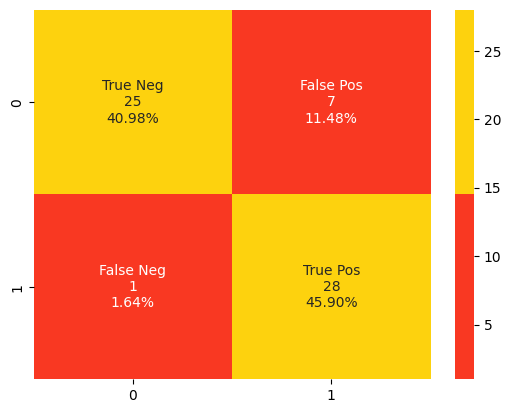

In [47]:
model_evaluation(classifier_lr)